In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import sys
from pathlib import Path

In [2]:
## Change to your own path
path_photoz = "/jet/home/gvincent/encapZulate-1/src"

sys.path.insert(1, path_photoz)
path_photoz = Path(path_photoz)

In [3]:
import encapzulate
from encapzulate.data_loader.data_loader import load_data
from encapzulate.utils.fileio import load_config

Using TensorFlow backend.


In [4]:
CONFIG_FILE = 'galen_encoder-decoder-eye.yml'
config = load_config(path_photoz / "encapzulate" / "configs" / CONFIG_FILE, verbose = False)
config["input_shape"] = config["image_shape"]
config["num_gpus"] = 4
config['dataset'] = 'satellite_images_clean'
config['dataset_aux'] = 'tc_data_clean'
config['eye_check'] = 'exclude'
#config["run_name"] = "test"
#config["epochs"] = 10
#config["learning_rate"] = 0.001
#config["batch_size"] = 300
#config["image_scale"] = 50.0
config

{'run_name': 'encoder-decoder-eye',
 'num_gpus': 4,
 'compile_on': 'cpu',
 'path_data': '/ocean/projects/dms190029p/gvincent/tc-rmw-data',
 'dataset': 'satellite_images_clean',
 'dataset_aux': 'tc_data_clean',
 'image_shape': (200, 200, 1),
 'class_var': 'eye',
 'eye_check': 'exclude',
 'num_class': 2,
 'max_year_train': 2016,
 'max_year_dev': 2018,
 'random_state': 200,
 'image_scale': 50.0,
 'class_weights': [1.0, 1.0],
 'grid_scale': 4.0,
 'model_name': None,
 'routings': 3,
 'dim_capsule': 16,
 'batch_size': 200,
 'epochs': 100,
 'checkpoint': None,
 'learning_rate': 0.001,
 'decay_rate': 0.95,
 'lam_recon': 0.75,
 'hwhm': 175.0,
 'timeline': False,
 'path_results': None,
 'input_shape': (200, 200, 1)}

In [39]:
((x_train, y_train, rmw_train, aux_train),
 (x_dev, y_dev, rmw_dev, aux_dev),
 (x_test, y_test, rmw_test, aux_test)) = load_data(**config)

In [40]:
x_train.shape

(22153, 200, 200, 1)

<AxesSubplot:>

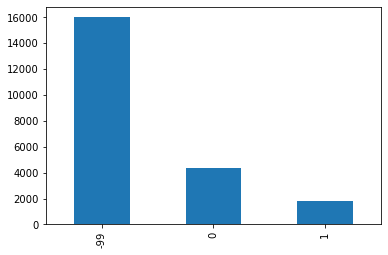

In [70]:
# Look at class proportions:
aux_train.eye.value_counts().plot(kind='bar')

In [ ]:
# Explore the eye dataset

In [11]:
aux_train.head(5)

,category_num,wind,eye,nan_frac,lat,lon,pressure_min,distance,age,eye_diam,synoptic
0,0,35.0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0,35.0,0,0.000025,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0,35.0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0
3,0,35.0,0,0.000098,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0,35.0,0,0.002000,NaN,NaN,NaN,NaN,NaN,NaN,1


<AxesSubplot:>

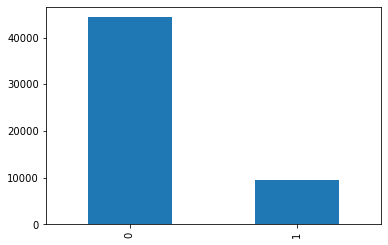

In [9]:
aux_train.eye.value_counts().plot(kind = 'bar')

In [12]:
#eye_check_idx = np.argwhere(aux_train.eye.to_numpy() == -99).flatten()
eye_idx = np.argwhere((aux_train.eye.to_numpy() == 1) & (aux_train.synoptic.to_numpy() == 1)).flatten()
no_eye_idx = np.argwhere(aux_train.eye.to_numpy() == 0).flatten()

In [15]:
eye_idx.shape

(772,)

In [16]:
titles = {
    0: 'Eye',
    1: 'No Eye',
    2: 'Unknown'
}

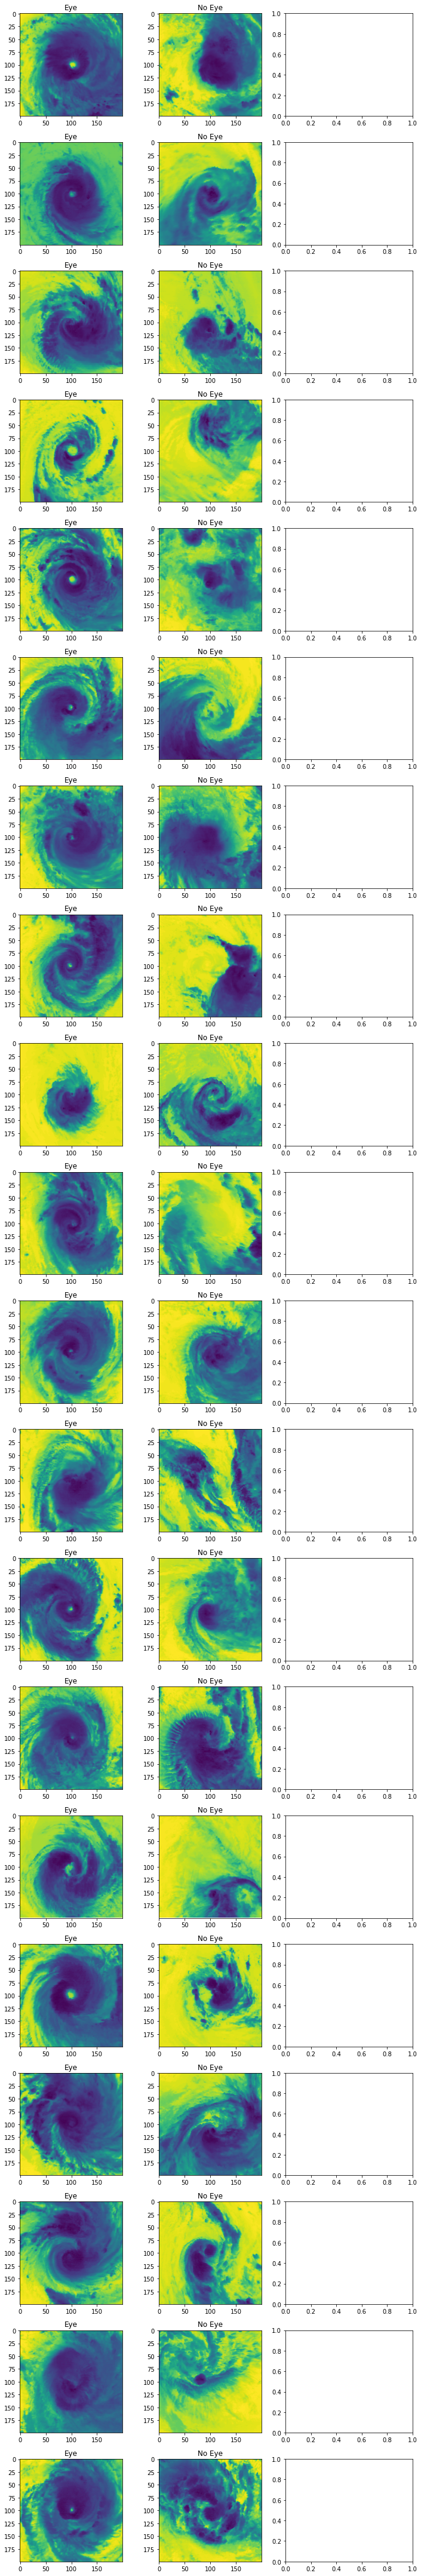

In [19]:
nplot = 20
fig, axs = plt.subplots(nrows = nplot, ncols = 3, figsize = (10, 60))
randseed = 42
np.random.seed(randseed)
indices = [np.random.choice(x, size = nplot, replace = False) for x in [eye_idx, no_eye_idx]]
indices = np.array(indices).T

for ii, ind in enumerate(indices):
    for jj, idx in enumerate(ind):
        #print(f'{ii}, {jj}, {idx}')
        axs[ii, jj].imshow(x_train[idx])
        if jj == 2:
            axs[ii, jj].set_title(f'Eye Check: {int(aux_train.iloc[idx].eye)}')
        else:
            axs[ii, jj].set_title(titles[jj])

plt.tight_layout()